# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

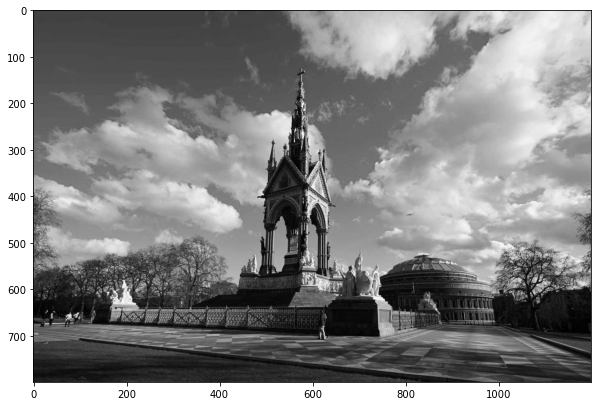

In [2]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

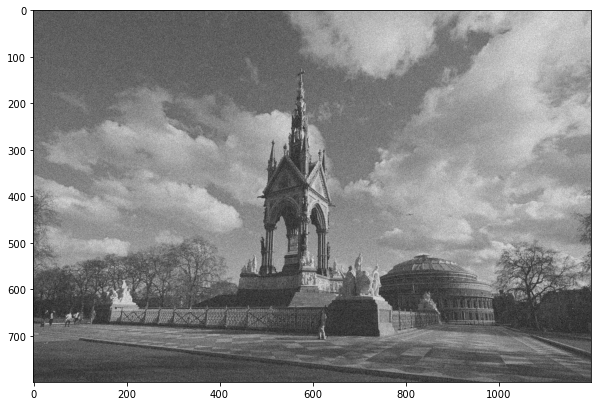

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

In [4]:
def get_avg_filter(avg_filter_dim):
    """
    in: 
        avg_filter_dim: avg_filter_dim x avg_filter_dim moving average filter. Size of a "side" of the filter
    out:
        out: filter as a numpy image_in of 1/(avg_filter_dim x avg_filter_dim)
    """
    # Obtain the feature (avg_filter_dim x avg_filter_dim) needed during the convolution
    avg_filter_size = avg_filter_dim * avg_filter_dim
    return np.ones((avg_filter_dim,avg_filter_dim))/avg_filter_size

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


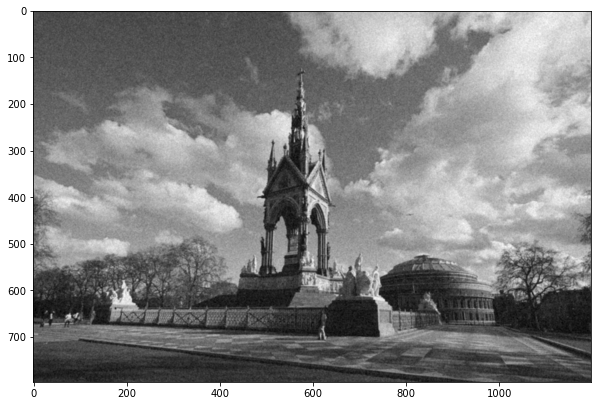

In [5]:
# Design the filter h
h = get_avg_filter(3)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, 'valid')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

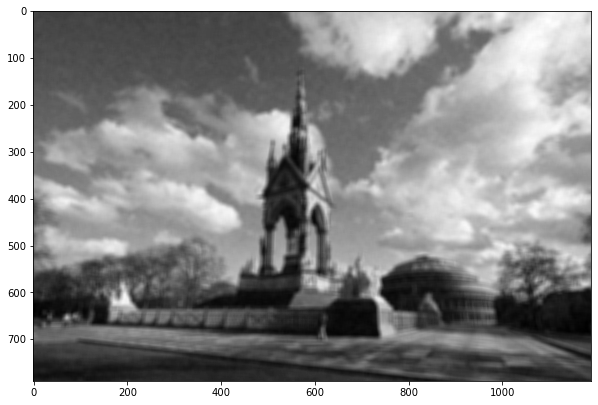

In [6]:
# Design the filter h
h = get_avg_filter(11)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, 'valid')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

For both cases, the moving average filter blurs out the noise added to the image, smooths the edges and removes some sharp discontinuities. This is a type of low pass filter that blurs out the details. A smaller kernel is preferable since it smoothes the image without loss of information like it happens for the 11x11 kernel.

![Alt Text](https://miro.medium.com/max/790/1*d03OGSWsBqAKBTP2QSvi3g.gif)



The amount of blurring is correlated to the value of the kernel size. As shown in the gif above, each convolution computes the weighted average of the neighbouring pixels. A majority of edge (dark) pixels will output an edge. A majority of background (light) pixels result in a lighter pixel. As the initial image has few edges, low-pass filtering is likely to remove most edges through this proces. Whilst the 11x11 kernel removes all noise from the image and has an overall better noise filtering, the filter loses most edges due to its size and some information is lost. This is because close edges - such as the top of the building on the image - are too close for the kernel and were averaged altogether in a single one. This filter is therefore robust to noise but results in edge dislocation and suppression. 

The 3x3 kernel seems to be a better compromise since the output image is less noisy than the noisy_image input, yet not as clear as the real image. The kernel is still too small compared to the noise as there is some noise in the sky, the building has a lighter colour and is less sharp than it should be. This time, the filter keeps the edges, blurs out some noise at a small scale. When the noise is greater than the kernel size; e.g: 6 noisy pixels out of the 9 in the average filter, the central pixel is wrongly averaged and noise is kept or spread at different points.


## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

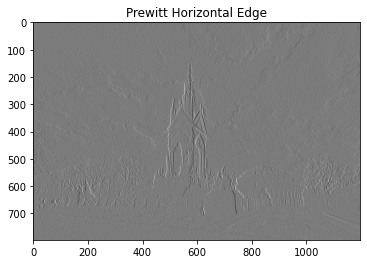

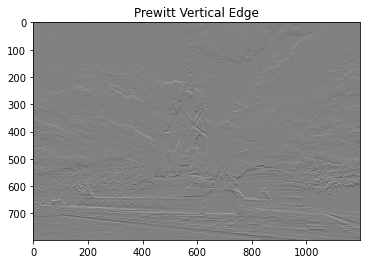

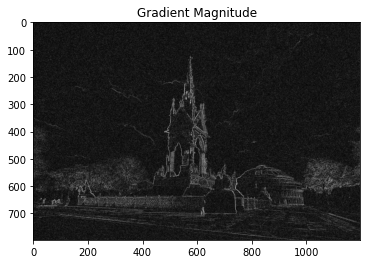

prewitt_x:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
prewitt_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


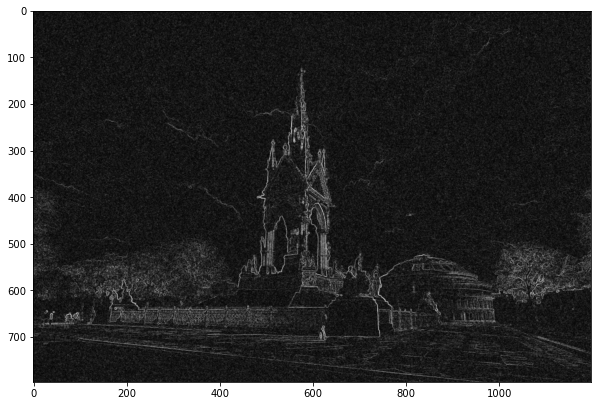

In [7]:

# Design the Prewitt filters
prewitt_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
prewitt_y = np.flip(prewitt_x.T, axis=0)


# Prewitt filtering
def prewitt_filtering(image, prewitt_x, prewitt_y, verbose=False):
    """
    in:
        image: array to represent the input image
        prewitt_x: filter to convole along horizontal axis
        prewitt_y:  filter to convole along vertical axis
        verbose (optional): to print the prewitt filters convolved images along x and y axis
    out:
        gradient magnitude representing the convolved image with both prewitt filters, adjusted to the gray scale 
    """
    x_image = scipy.signal.convolve2d(image, prewitt_x, 'valid')
 
 
    y_image =scipy.signal.convolve2d(image, prewitt_y, 'valid')
 
    gradient_magnitude = np.sqrt(np.square(x_image) + np.square(y_image))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(x_image, cmap='gray')
        plt.title("Prewitt Horizontal Edge")
        plt.show()
    if verbose:
        plt.imshow(y_image, cmap='gray')
        plt.title("Prewitt Vertical Edge")
        plt.show()
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude


# Calculate the gradient magnitude
grad_mag = prewitt_filtering(image_noisy, prewitt_x, prewitt_y, verbose=True)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

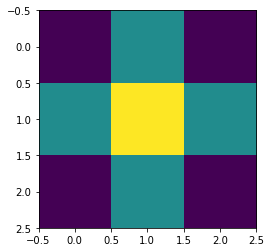

In [8]:
def density_norm(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.e ** (-np.power((x - mu) / sigma, 2) / 2)
 

# Design the Gaussian filter
def create_2D_gaussian_filter(sigma=3, verbose=False):
    """
    in:
        sigma: size of the gaussian filter (in pixels)
        verbose (optional): to print the prewitt filters convolved images along x and y axis
    out:
        h: gaussian_filter as a 2D array, assuming the size_kernel is the same as for prewitt filtering. (3) 
    """
    size_kernel = 3 #assume same as prewitt

    mykernel = np.linspace(-(size_kernel // 2), size_kernel // 2, size_kernel)
    for i in range(size_kernel):
        mykernel[i] = density_norm(mykernel[i], 0, sigma)
    h = np.outer(mykernel.T, mykernel.T)
    h *= 1.0 / h.max()
 
    if verbose:
        plt.imshow(h, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = create_2D_gaussian_filter(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

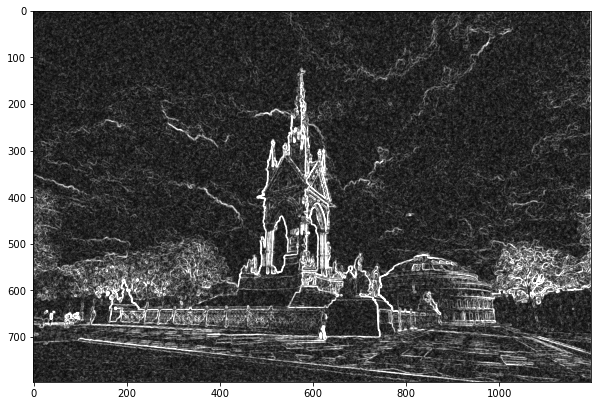

In [82]:
def perform_gaussian_smooth(image, sigma, verbose=False):
    """
    in:
        image: image to be convolved with the gaussian 2D filter 
        sigma: size of the gaussian filter (in pixels)
        verbose (optional): to print the prewitt filters convolved images along x and y axis
    out:
        convolved image with a 2D gaussian filter constructed from sigma
    """
    mykernel = create_2D_gaussian_filter(sigma, verbose=verbose)
    return scipy.signal.convolve2d(image, mykernel, 'same')

# Perform Gaussian smoothing before Prewitt filtering
image_smooth = perform_gaussian_smooth(image_noisy, 3, verbose=False)

# Prewitt filtering + Calculate the gradient magnitude
grad_mag = prewitt_filtering(image_smooth, prewitt_x, prewitt_y)


# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

Time to complete 2D gaussian smoothing with a 7x7 kernel:  0.028916358947753906
(799, 1200) (799, 1200)


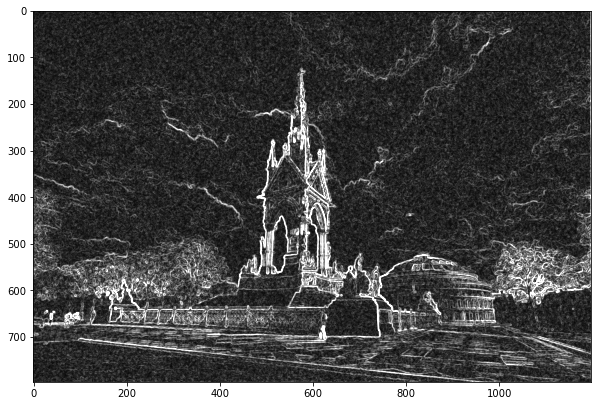

In [83]:
# Construct the Gaussian filter (included in gaussian smoothing function)

# Perform Gaussian smoothing and count time
start = time.time()
image_smooth = perform_gaussian_smooth(image_noisy, 7, verbose=False)
end = time.time()
print("Time to complete 2D gaussian smoothing with a 7x7 kernel: ", end - start)
conv2Dtime = end - start
print(image_noisy.shape, image_smooth.shape)
# Prewitt filtering
# Calculate the gradient magnitude
grad_mag = prewitt_filtering(image_smooth, prewitt_x, prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)



### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

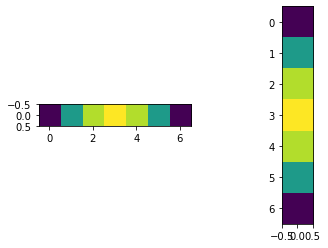

In [84]:


# Design the Gaussian filter
def create_1D_gaussian_filter(sigma, verbose=False):
    """
    in:
        sigma: size of the gaussian filter (in pixels)
        verbose (optional): to print the prewitt filters convolved images along x and y axis
    out:
        convolved image with a 1D gaussian filter constructed from sigma
    """
    size_kernel = sigma
    h = np.linspace(-(size_kernel // 2), size_kernel // 2, size_kernel)
    h = density_norm(h, 0, sigma)
    h *= 1.0 / h.max()
 
    if verbose:
        plt.imshow(h, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
    return np.array(h,dtype='float')

    
# sigma = 7 pixel (provided)
sigma = 7
filter_1D = create_1D_gaussian_filter(sigma)

# The Gaussian filter along x-axis. Its shape is (1, sigma).
h_x = np.reshape(filter_1D,(1, filter_1D.size))
# The Gaussian filter along y-axis. Its shape is (sigma, 1).
h_y = np.reshape(filter_1D,(filter_1D.size, 1))

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

Time to complete 1D gaussian smoothing with a 7x1, 1x7 kernel:  0.024933815002441406
(797, 1198) (797, 1198)
7x7 Gaussian filter then Prewitt gradient:  22.559672695731194
1x7,7x1 Gaussian filter then Prewitt gradient:  16.145281868949667
Difference in gradients:  -6.414390826781528
Difference in time (speedup with conv1D) 0.0039825439453125


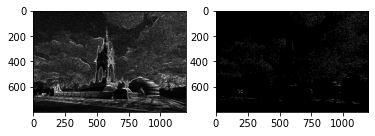

In [88]:
def perform_gaussian_smooth_1d(image, sigma, verbose=False):
    filter_1D = create_1D_gaussian_filter(sigma)

    # The Gaussian filter along x-axis. Its shape is (1, sigma).
    h_x = np.reshape(filter_1D,(1, filter_1D.size))
    # The Gaussian filter along y-axis. Its shape is (sigma, 1).
    h_y = np.reshape(filter_1D,(filter_1D.size, 1))
    convolved_x =scipy.ndimage.convolve1d(image, weights=h_x[0,:])
    convolved_y =scipy.ndimage.convolve1d(image, weights=h_y[:,0])
    return convolved_x * convolved_y

# Perform separable Gaussian smoothing and count time
start = time.time()
image_smooth = perform_gaussian_smooth_1d(image_noisy, 7)
end = time.time()
print("Time to complete 1D gaussian smoothing with a 7x1, 1x7 kernel: ", end - start)

# Prewitt filtering
# Calculate the gradient magnitude
grad_mag2 = prewitt_filtering(image_smooth, prewitt_x, prewitt_y)

print(grad_mag.shape, grad_mag2.shape)

# Display the gradient magnitude image (provided)
plt.subplot(1, 2, 1)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.subplot(1, 2, 2)
plt.imshow(grad_mag2-grad_mag, cmap='gray', vmin=0, vmax=100)
# plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
# plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
print("7x7 Gaussian filter then Prewitt gradient: ", np.mean(grad_mag))
print("1x7,7x1 Gaussian filter then Prewitt gradient: ", np.mean(grad_mag2))
print("Difference in gradients: ", np.mean(grad_mag2)-np.mean(grad_mag))
print ("Difference in time (speedup with conv1D)", conv2Dtime - (end - start))

### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

#### General comments 

Prewitt filtering combined with Gaussian filtering outputs a smoothed image with edge definition. This is because Prewitt filters are high pass filters - they enhance details and detect edges (in horizontal then vertical direction). Gaussian filtering is a low pass filter that blurs out details.
Since Prewitt filtering is performed after each 1D or 2D Gaussian filter, the output image is different than the input image without noise.

1. Gaussian image on the noisy image blurs the image, it is commonly used to downsample images in digital image processing, reducing their size. Pixels are averaged according to the Gaussian filter. It smoothes detals, removes the details and noise like the average moving filter using a different kernel with weighted weights to be more similar to the original imagE.
2. Prewitt filtering enhances details and edges that were kept after Gaussian filtering. The output image is an enhanced (high-pass) version of the smoothed input. This explains why the gray scale is overall dark; the details in the background were removed. The edges are white as the Prewitt filters enhanced the building's contour. There is some white to indicate clouds that were not removed during Gaussian filtering.


#### Common results 
Both of the strategies for implementing Gaussian then Prewitt filtering resulted in the same image. The rightmost graph shows a difference in gradient magniture of zero accross all image spectrum between the 7x7 gaussian and 7x1 then 1x7 gaussian convolution filters. 

For 2D convolution, the noisy image is convoluted with both "channels" (as seen with the tensorflow example). 
<!-- ![Alt Text](https://i.stack.imgur.com/uwHol.gif) -->
![Alt Text](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

For 1D convolution, performed on both axis, the output is the same because each 1xN convolution does 'half' of the NxN convolution. In this case, the filter is one dimensional.
Both operation output a convolution along both dimension.

##### Mathematical explanation 

For x[horz, vert] represents the noisy image n input as a numpy array (or matrix), with 
- horz: horizontal edge of the image
- vert: vertical edge of the image


The separable Conv2D gaussian filter can be written as h[horz, vert] = a[horz]b[vert], with each of a[horz] and b[vert] representing the conv1D filter along each axis.
Looking at the 2D convolution filter printed in the exercise above, this makes sense - each lenth of the NxN square is made from the combination of the horizontal and linear 1D filter.
1. The output image shown above is y, such as  


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y[horz, vert] = x[horz, vert] ⋆ h[horz, vert] $ 


2. Which is equal to


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y[horz, vert] = \sum_k \sum_r h[horz-k, vert-r] \times x[k, r] $

3. Using the fact that h[horz, vert] is separable:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y[horz, vert] = \sum_k \sum_r a[horz-k] \times b[vert-r] \times x[k, r] $


4. Setting $\sum_r b[vert-r] \times x[k, r]  = conv_{cols}[k, vert]$ yields:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y[horz, vert] = \sum_k a[horz-k] (\sum_r b[vert-r] \times x[k, r] ) = a[n] ⋆ conv_{cols}[k, vert]$


On the equation above, the right hand side corresponds to a column convolution (1D) and this is then convoluted a]horz-k], which convolves the rows together. 



#### Difference in performance

Whilst the output image is the same, the computational time to perform separable 2D and 2D convolution is different. 
1D convolution offers a speedup of BLABLA. 
There is a significant difference in computation complexity of 1D and 2D convolutions. 

    An image with NxN dimension convoled with a KxK kernel has a computational complexity $O(N^2, K^2)$. The KxK kernel produces an output for each of the pixels in the NxN image. 
    For a Kx1 kernel followed by 1xK, the computational complexity is reduced to $O(NK)$
 

Under the same configurations to perform gaussian smoothing, the complexity of 1D filter is therefore lower than for the 2D filter. 
This explains the difference in time taken to realise the filtering. 




*Source:*


- *Serkan Kiranyaz, Onur Avci, Osama Abdeljaber, Turker Ince, Moncef Gabbouj, Daniel J. Inman,*
- *1D convolutional neural networks and applications: A survey,*
- *Mechanical Systems and Signal Processing,*
- *Volume 151,*
- *2021,*
- *107398*,
- *ISSN 0888-3270,*
-  *https://doi.org/10.1016/j.ymssp.2020.107398.*

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [18]:
# Import libaries (provided)
import torch

#extra libraries 
from torch import nn
from torch.nn import functional as F
import numbers

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [28]:
# Expand the dimension of the numpy array
print(image_noisy.shape)
reshaped_noisy = image_noisy.reshape((1,1,image_noisy.shape[0],image_noisy.shape[1] ))

# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_tensor = torch.from_numpy(reshaped_noisy)

(799, 1200)


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [32]:

class GaussianSmoothing(nn.Module):
    """
    Apply gaussian smoothing on a
    1d, 2d or 3d tensor. Filtering is performed seperately for each channel
    in the input using a depthwise convolution.
    Arguments:
        channels (int, sequence): Number of channels of the input tensors. Output will
            have this number of channels as well.
        size_kernel (int, sequence): Size of the gaussian kernel.
        sigma (float, sequence): Standard deviation of the gaussian kernel.
        dim (int, optional): The number of dimensions of the data.
            Default value is 2 (spatial).
    """
    def __init__(self, channels, size_kernel, sigma, dim=2):
        super(GaussianSmoothing, self).__init__()
        if isinstance(size_kernel, numbers.Number):
            size_kernel = [size_kernel] * dim
        if isinstance(sigma, numbers.Number):
            sigma = [sigma] * dim

        # The gaussian kernel is the product of the
        # gaussian function of each dimension.
        kernel = 1
        meshgrids = torch.meshgrid(
            [
                torch.arange(size, dtype=torch.float32)
                for size in size_kernel
            ]
        )
        for size, std, mgrid in zip(size_kernel, sigma, meshgrids):
            mean = (size - 1) / 2
            kernel *= 1 / (std * math.sqrt(2 * math.pi)) * \
                      torch.exp(-((mgrid - mean) / std) ** 2 / 2)

        # Make sure sum of values in gaussian kernel equals 1.
        kernel = kernel / torch.sum(kernel)

        # Reshape to depthwise convolutional weight
        kernel = kernel.view(1, 1, *kernel.size())
        kernel = kernel.repeat(channels, *[1] * (kernel.dim() - 1))

        self.register_buffer('weight', kernel)
        self.groups = channels

        if dim == 1:
            self.conv = F.conv1d
        elif dim == 2:
            self.conv = F.conv2d
        else:
            raise RuntimeError(
                'Maximum dimension is 2D {}.'.format(dim)
            )

    def transfer(self, input):
        """
        Apply gaussian filter to input.
        Arguments:
            input (torch.Tensor): Input to apply gaussian filter on.
        Returns:
            filtered (torch.Tensor): Filtered output.
        """
        return self.conv(input, weight=self.weight.double(), groups=self.groups)
flter = GaussianSmoothing(1, 3, 15)

### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

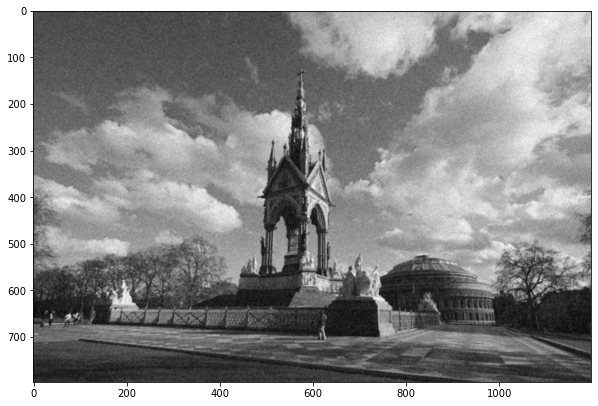

In [33]:
# Filtering
image_filtered = flter.transfer(image_noisy_tensor)

# image_filtered = image_filtered.reshape((image_filtered[2],image_filtered.shape[3] ))

# Display the filtering result (provided)
plt.imshow(image_filtered.reshape(797, 1198), cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

In [ ]:
Part 1: 20 minutes (without comments/explanations)

Part 2: 50mn (without comments/explanations)
    
Part 3: 1h30mn (never used pytorch before)

Comments + explanations : 1 hour